In [4]:
from pyspark.sql import SparkSession
import pandas as pd 

spark = SparkSession.builder.getOrCreate()

# Read CSV file
csv_df = spark.read.csv("raw_data/FW_Fish_Individual_Lengths.csv", header=True, inferSchema=True, multiLine=True)

csv_df.write.mode("overwrite").parquet("working_data/FW_Fish_Individual_Lengths.parquet")

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# Read the Parquet file
df = spark.read.parquet("working_data/FW_Fish_Individual_Lengths.parquet")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/07/19 13:18:14 WARN Utils: Your hostname, codespaces-6557a2, resolves to a loopback address: 127.0.0.1; using 10.0.1.32 instead (on interface eth0)
25/07/19 13:18:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/19 13:18:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/07/19 13:18:16 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/07/19 13:18:16 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [2]:
# Testing to ensure the schema of the DataFrame matches the original CSV schema
from pyspark.testing import assertSchemaEqual

try:
    assertSchemaEqual(csv_df.schema, df.schema)
    print("Schema match successful")
except AssertionError as e:
    print("Schema match failed")
    print(e)

NameError: name 'csv_df' is not defined

In [3]:
df.printSchema()
df.show(5)

root
 |-- SURVEY_ID: integer (nullable = true)
 |-- SURVEY_SPECIES_ID: integer (nullable = true)
 |-- SPECIES_ID: integer (nullable = true)
 |-- SPECIES_RUN_ID: integer (nullable = true)
 |-- RUN_NUMBER: integer (nullable = true)
 |-- LW_MEASURED_ID: integer (nullable = true)
 |-- FISH_LENGTH: integer (nullable = true)
 |-- FISH_WEIGHT: double (nullable = true)
 |-- AGE_BAND: string (nullable = true)
 |-- NALL_AGE: string (nullable = true)

+---------+-----------------+----------+--------------+----------+--------------+-----------+-----------+--------+--------+
|SURVEY_ID|SURVEY_SPECIES_ID|SPECIES_ID|SPECIES_RUN_ID|RUN_NUMBER|LW_MEASURED_ID|FISH_LENGTH|FISH_WEIGHT|AGE_BAND|NALL_AGE|
+---------+-----------------+----------+--------------+----------+--------------+-----------+-----------+--------+--------+
|   176011|           758857|       111|       1007731|         2|       9498746|        134|       NULL|      >0|    NULL|
|   176011|           758857|       111|       1007731|    

In [4]:
import os

csv_path = "raw_data/FW_Fish_Individual_Lengths.csv"
parquet_dir = "working_data/FW_Fish_Individual_Lengths.parquet"

# Get CSV file size
csv_size = os.path.getsize(csv_path)

# Get Parquet directory total size
parquet_size = 0
for dirpath, dirnames, filenames in os.walk(parquet_dir):
    for f in filenames:
        fp = os.path.join(dirpath, f)
        parquet_size += os.path.getsize(fp)

print(f"CSV file size: {csv_size / 1024:.2f} KB")
print(f"Parquet file size: {parquet_size / 1024:.2f} KB")
print(f"Parquet file size is {parquet_size / csv_size * 100 :.2f}% of CSV file size")

CSV file size: 302376.03 KB
Parquet file size: 48593.09 KB
Parquet file size is 16.07% of CSV file size


In [5]:
df.describe().show()

25/07/19 13:19:26 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+
|summary|         SURVEY_ID| SURVEY_SPECIES_ID|        SPECIES_ID|    SPECIES_RUN_ID|        RUN_NUMBER|    LW_MEASURED_ID|       FISH_LENGTH|      FISH_WEIGHT|          AGE_BAND|          NALL_AGE|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+
|  count|           7367578|           7367578|           7367578|           7367578|           7367578|           7367578|           7367578|           240058|           1130971|             23866|
|   mean| 93682.65089680761|361486.63287636725|186.76893668448437|456139.34172627697|1.2403370551353512| 4823066.600317092|121.35132888990113|294.6411737996638|2.3283536234110374|2.1630705394190812|
| std

In [5]:
df.summary().show()

ERROR:root:Exception while sending command.                         (1 + 1) / 2]
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3670, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_44617/2261204268.py", line 1, in <module>
    df.summary().show()
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pyspark/sql/classic/dataframe.py", line 285, in show
    print(self._show_string(n, truncate, vertical))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pyspark/sql/classic/dataframe.py", line 303, in _show_string
    return self._jdf.showString(n, 20, vertical)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/py4j/java_gateway.py", line 1362, in __call__
    return_value = get_return_value(
                   ^^^^^^^^^^^^^^^^^
  

ConnectionRefusedError: [Errno 111] Connection refused

ConnectionRefusedError: [Errno 111] Connection refused

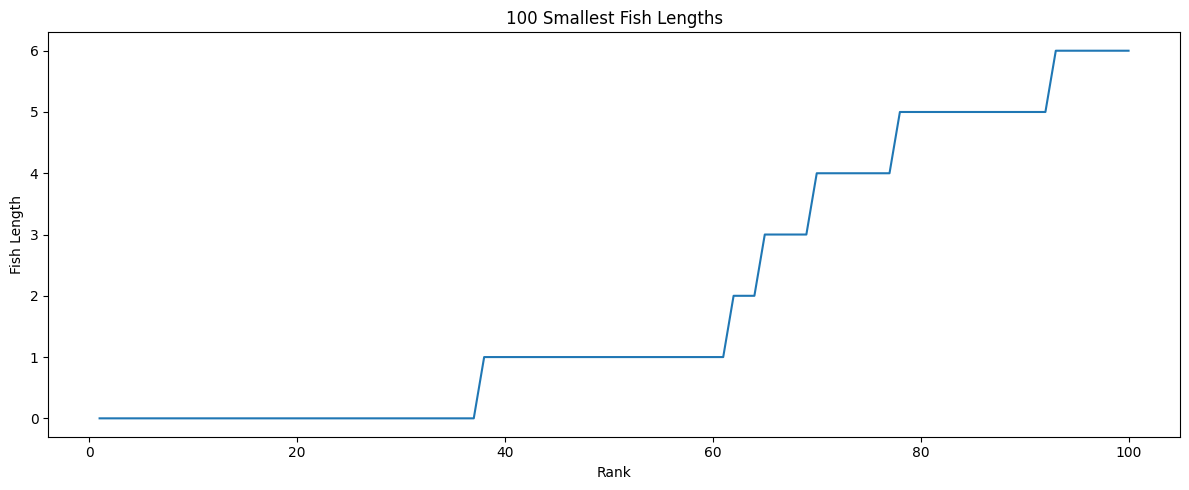

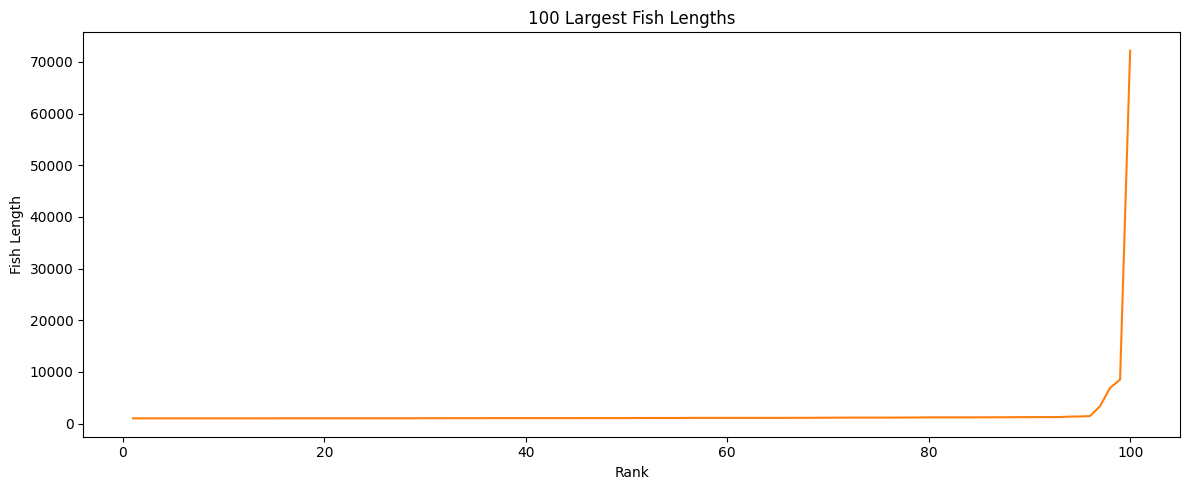

In [ ]:
import matplotlib.pyplot as plt


# Get 100 smallest fish lengths
smallest_100_sdf = df.orderBy("FISH_LENGTH").select("FISH_LENGTH").limit(100)
smallest_100_pd = smallest_100_sdf.toPandas()

# Get 100 largest fish lengths
largest_100_sdf = df.orderBy(df["FISH_LENGTH"].desc()).select("FISH_LENGTH").limit(100)
largest_100_pd = largest_100_sdf.toPandas().sort_values(by="FISH_LENGTH")


plt.figure(figsize=(12, 5))
plt.plot(range(1, 101), smallest_100_pd["FISH_LENGTH"].values, label="Smallest 100", color='tab:blue')
plt.xlabel("Rank")
plt.ylabel("Fish Length")
plt.title("100 Smallest Fish Lengths")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(range(1, 101), largest_100_pd["FISH_LENGTH"].values, label="Largest 100", color='tab:orange')
plt.xlabel("Rank")
plt.ylabel("Fish Length")
plt.title("100 Largest Fish Lengths")
plt.tight_layout()
plt.show()

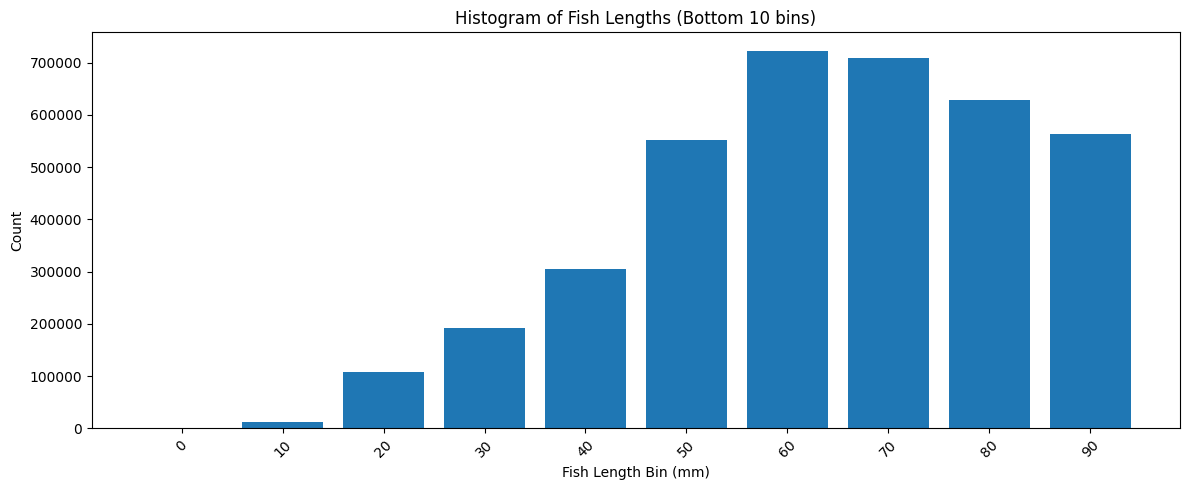

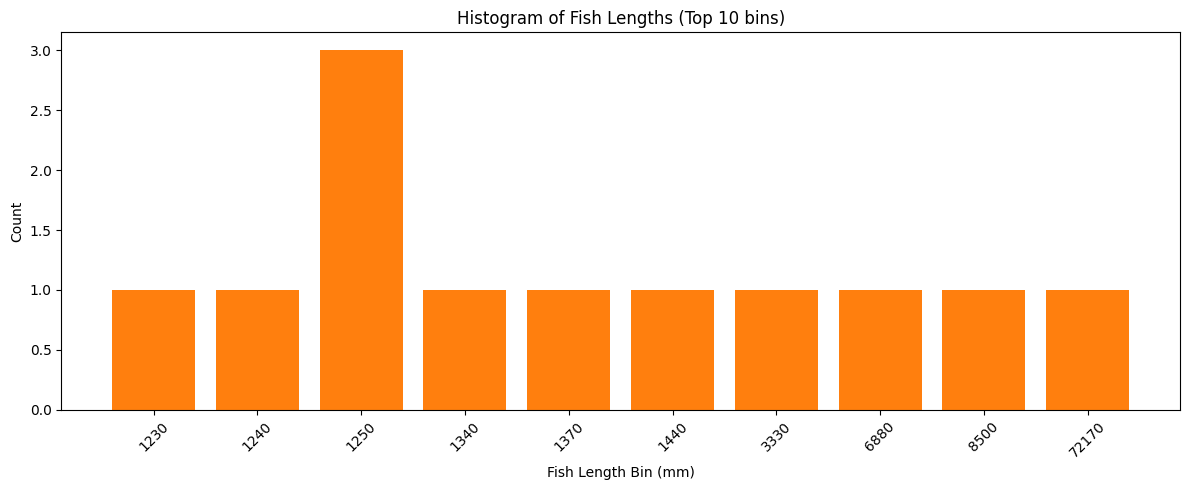

In [ ]:
import matplotlib.pyplot as plt

# Compute histogram bins and counts using PySpark
bin_width = 10
min_length = df.agg({"FISH_LENGTH": "min"}).collect()[0][0]
max_length = df.agg({"FISH_LENGTH": "max"}).collect()[0][0]
bins = list(range((min_length // bin_width) * bin_width, ((max_length // bin_width) + 2) * bin_width, bin_width))

# Assign bin to each row
import pyspark.sql.functions as F

df_hist = df.withColumn(
    "length_bin",
    ((F.col("FISH_LENGTH") / bin_width).cast("int") * bin_width)
)

# Group by bin and count
hist_counts = (
    df_hist.groupBy("length_bin")
    .count()
    .orderBy("length_bin")
    .toPandas()
)

# Show only bottom 10 and top 10 bins
bottom_10 = hist_counts.head(10)
top_10 = hist_counts.tail(10)


plt.figure(figsize=(12, 5))
plt.bar(bottom_10["length_bin"].astype(str), bottom_10["count"], color='tab:blue')
plt.xlabel("Fish Length Bin (mm)")
plt.ylabel("Count")
plt.title("Histogram of Fish Lengths (Bottom 10 bins)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(top_10["length_bin"].astype(str), top_10["count"], color='tab:orange')
plt.xlabel("Fish Length Bin (mm)")
plt.ylabel("Count")
plt.title("Histogram of Fish Lengths (Top 10 bins)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Total count in histogram: 7367578
Total rows in DataFrame: 7367578
Validation passed: All values are accounted for in the histogram.


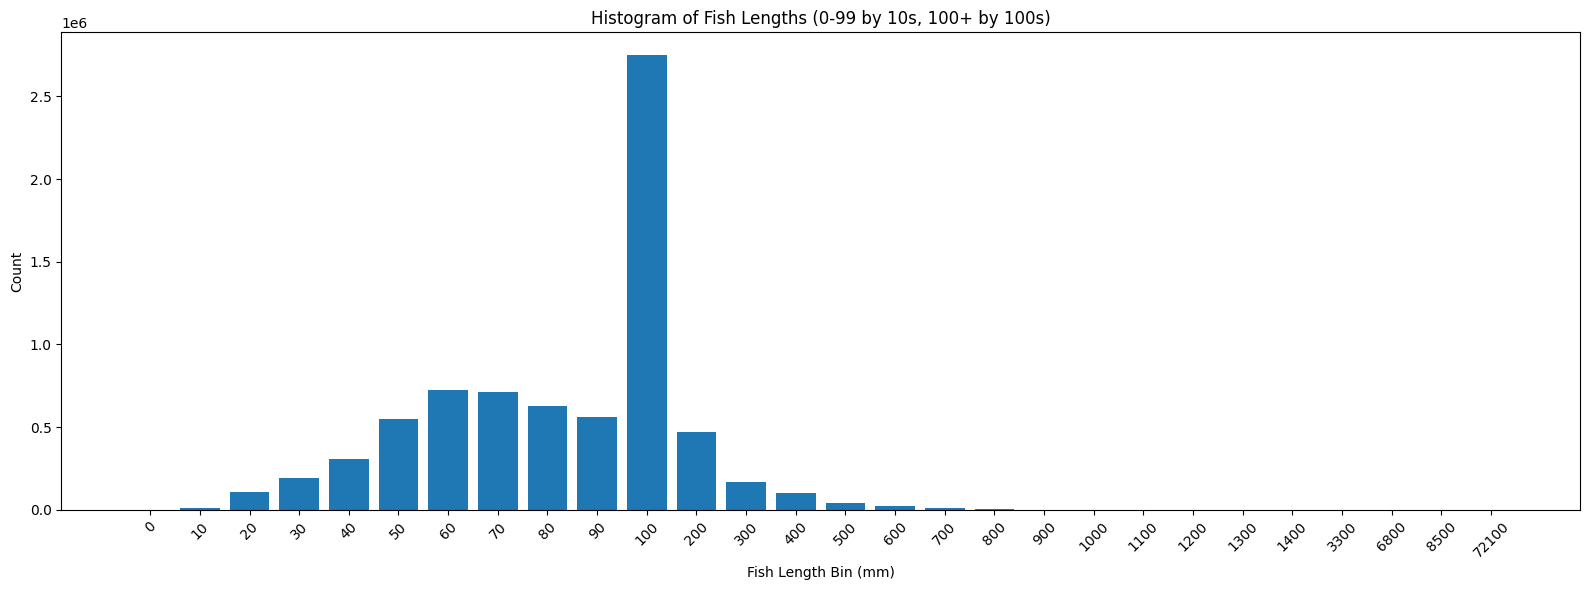

In [ ]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Calculate max_length from your data
max_length = df.agg(F.max("FISH_LENGTH")).collect()[0][0]

# Define bins: 0-9, 10-19, ..., 90-99, 100-199, 200-299, ...
bin_edges = list(range(0, 100, 10))  # [0, 10, 20, ..., 90]
if max_length >= 100:
    # 100-199, 200-299, ..., up to just above max_length
    bin_edges += list(range(100, ((max_length // 100) + 2) * 100, 100))
bins = bin_edges

# Assign bin to each row
def custom_bin(length):
    if length < 100:
        return (length // 10) * 10
    else:
        return (length // 100) * 100

custom_bin_udf = F.udf(custom_bin, "int")

df_hist_custom = df.withColumn(
    "length_bin",
    custom_bin_udf(F.col("FISH_LENGTH"))
)

# Group by bin and count
hist_counts_custom = (
    df_hist_custom.groupBy("length_bin")
    .count()
    .orderBy("length_bin")
    .toPandas()
)

total_hist_count = hist_counts_custom["count"].sum()
print(f"Total count in histogram: {total_hist_count}")

# Optionally, compare to the total number of rows in your DataFrame
total_df_count = df.count()
print(f"Total rows in DataFrame: {total_df_count}")

if total_hist_count == total_df_count:
    print("Validation passed: All values are accounted for in the histogram.")
else:
    print("Validation failed: Counts do not match.")

# Plot
plt.figure(figsize=(16, 6))
plt.bar(hist_counts_custom["length_bin"].astype(str), hist_counts_custom["count"], color='tab:blue')
plt.xlabel("Fish Length Bin (mm)")
plt.ylabel("Count")
plt.title("Histogram of Fish Lengths (0-99 by 10s, 100+ by 100s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Count number of fish with FISH_LENGTH between 100 and 199 (inclusive)
count_100_199 = df.filter((df.FISH_LENGTH >= 100) & (df.FISH_LENGTH <= 199)).count()
print(f"Number of fish with length between 100 and 199: {count_100_199}")

# Count number of fish with FISH_LENGTH between 0 and 99 (inclusive)
count_0_99 = df.filter((df.FISH_LENGTH >= 0) & (df.FISH_LENGTH <= 99)).count()
print(f"Number of fish with length between 0 and 99: {count_0_99}")

Number of fish with length between 100 and 199: 2749739
Number of fish with length between 0 and 99: 3792023


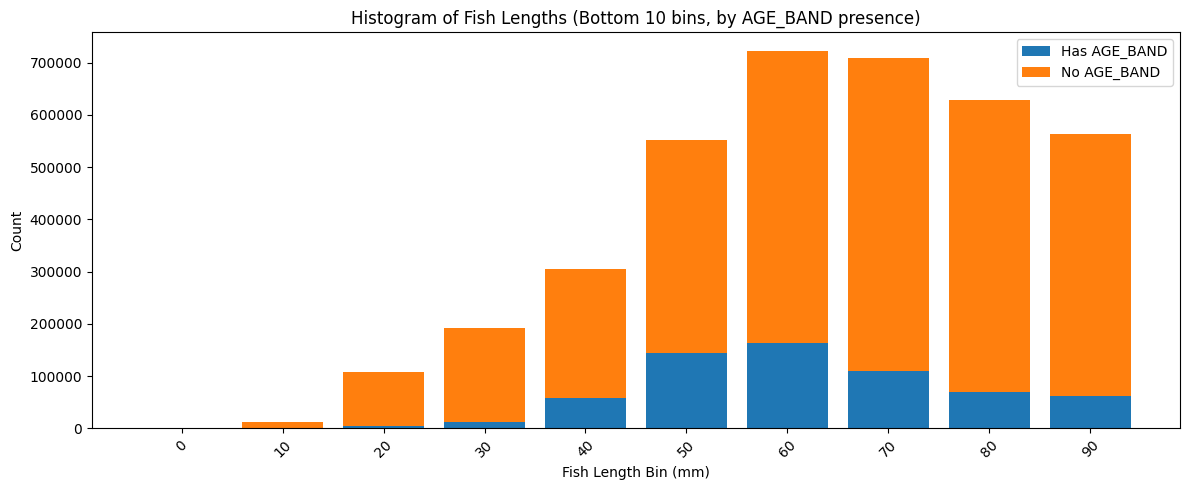

In [ ]:
# Group by length_bin and AGE_BAND null status
age_band_counts = (
    df_hist
    .withColumn("has_age_band", F.when(F.col("AGE_BAND").isNull(), "No AGE_BAND").otherwise("Has AGE_BAND"))
    .groupBy("length_bin", "has_age_band")
    .count()
    .orderBy("length_bin")
    .toPandas()
)

# Pivot for plotting
pivot = age_band_counts.pivot(index="length_bin", columns="has_age_band", values="count").fillna(0)
bottom_10_bins = bottom_10["length_bin"].values
pivot = pivot.loc[bottom_10_bins]

# Plot stacked bar
plt.figure(figsize=(12, 5))
plt.bar(pivot.index.astype(str), pivot["Has AGE_BAND"], label="Has AGE_BAND", color='tab:blue')
plt.bar(pivot.index.astype(str), pivot["No AGE_BAND"], bottom=pivot["Has AGE_BAND"], label="No AGE_BAND", color='tab:orange')
plt.xlabel("Fish Length Bin (mm)")
plt.ylabel("Count")
plt.title("Histogram of Fish Lengths (Bottom 10 bins, by AGE_BAND presence)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Find the 10 smallest fish with a non-null AGE_BAND
smallest_with_age_band = (
    df.filter(df.AGE_BAND.isNotNull())
    .orderBy("FISH_LENGTH")
    .select("FISH_LENGTH", "AGE_BAND")
    .limit(10)
    .toPandas()
)
smallest_with_age_band

,FISH_LENGTH,AGE_BAND
0,5,0
1,5,0
2,5,0
3,5,1+
4,6,0
5,6,0
6,7,0+
7,7,0+
8,7,0
9,7,1+


In [ ]:
df = df.filter((df.FISH_LENGTH > 5) & (df.FISH_LENGTH <= 2000))

In [ ]:
# Read counts CSV file into Spark DataFrame
counts_df = spark.read.csv("raw_data/FW_Fish_Counts.csv", header=True, inferSchema=True)

# Get unique SPECIES_ID with matched SPECIES_NAME and LATIN_NAME from counts_df
unique_species_list = (
    counts_df.select("SPECIES_ID", "SPECIES_NAME", "LATIN_NAME")
    .dropDuplicates(["SPECIES_ID"])
    .orderBy("SPECIES_ID")
    .collect()
)

# Convert to a list of dicts
species_info_list = [
    {
        "SPECIES_ID": row["SPECIES_ID"],
        "SPECIES_NAME": row["SPECIES_NAME"],
        "LATIN_NAME": row["LATIN_NAME"]
    }
    for row in unique_species_list
]

species_info_list[:5]  # Show first 5 as a sample

[{'SPECIES_ID': None, 'SPECIES_NAME': None, 'LATIN_NAME': None},
 {'SPECIES_ID': 1, 'SPECIES_NAME': 'All species', 'LATIN_NAME': None},
 {'SPECIES_ID': 103, 'SPECIES_NAME': 'Salmonid species', 'LATIN_NAME': None},
 {'SPECIES_ID': 111,
  'SPECIES_NAME': 'Brown / sea trout',
  'LATIN_NAME': 'Salmo trutta'},
 {'SPECIES_ID': 114,
  'SPECIES_NAME': 'Rainbow trout',
  'LATIN_NAME': 'Oncorhynchus mykiss'}]

In [ ]:
# Get unique SURVEY_ID and corresponding EVENT_DATE_YEAR from counts_df
unique_survey_list = (
    counts_df.select("SURVEY_ID", "EVENT_DATE_YEAR")
    .dropDuplicates(["SURVEY_ID"])
    .orderBy("SURVEY_ID")
    .collect()
)

# Convert to a list of dicts
survey_info_list = [
    {
        "SURVEY_ID": row["SURVEY_ID"],
        "EVENT_DATE_YEAR": row["EVENT_DATE_YEAR"]
    }
    for row in unique_survey_list
]

survey_info_list[:5]  # Show first 5 as a sample

[{'SURVEY_ID': 120, 'EVENT_DATE_YEAR': 2000},
 {'SURVEY_ID': 140, 'EVENT_DATE_YEAR': 2001},
 {'SURVEY_ID': 160, 'EVENT_DATE_YEAR': 2001},
 {'SURVEY_ID': 4001, 'EVENT_DATE_YEAR': 1987},
 {'SURVEY_ID': 4002, 'EVENT_DATE_YEAR': 1987}]

In [ ]:
import pandas as pd
import pyspark.sql.functions as F
from pyspark.sql.types import StringType
import re

# Create DataFrames from the lists
survey_info_pd = pd.DataFrame(survey_info_list)
species_info_pd = pd.DataFrame(species_info_list)

survey_info_sdf = spark.createDataFrame(survey_info_pd)
species_info_sdf = spark.createDataFrame(species_info_pd)

# Add EVENT_DATE_YEAR by matching SURVEY_ID
df_joined = df.join(survey_info_sdf, on="SURVEY_ID", how="left")

# Add SPECIES_NAME and LATIN_NAME by matching SPECIES_ID
df_joined = df_joined.join(species_info_sdf, on="SPECIES_ID", how="left")

# Aggregation for all years
agg_all = (
    df_joined.groupBy("SPECIES_ID")
    .agg(
        F.count("*").alias("species_count"),
        F.count(F.col("AGE_BAND")).alias("age_band_count"),
        F.collect_list("AGE_BAND").alias("age_band_list")
    )
)

# Helper to get unique AGE_BAND values with counts as a string
def format_age_band_counts(age_band_list):
    from collections import Counter
    counts = Counter([v for v in age_band_list if v is not None and str(v).strip() != ""])
    return ", ".join(f"{k} ({v})" for k, v in sorted(counts.items(), key=lambda x: x[0]))

format_age_band_counts_udf = F.udf(format_age_band_counts, returnType=StringType())

agg_all = agg_all.withColumn(
    "unique_AGE_BAND_values",
    format_age_band_counts_udf("age_band_list")
).drop("age_band_list")

# 5. Aggregation for EVENT_DATE_YEAR >= 2005
agg_2005 = (
    df_joined.filter(F.col("EVENT_DATE_YEAR") >= 2005)
    .groupBy("SPECIES_ID")
    .agg(
        F.count("*").alias("species_count_2005plus"),
        F.count(F.col("AGE_BAND")).alias("age_band_count_2005plus"),
        F.collect_list("AGE_BAND").alias("age_band_list_2005plus")
    )
)

agg_2005 = agg_2005.withColumn(
    "unique_AGE_BAND_values_2005plus",
    format_age_band_counts_udf("age_band_list_2005plus")
).drop("age_band_list_2005plus")

# 6. Join both aggregations
final_df = agg_all.join(
    agg_2005.select(
        "SPECIES_ID",
        "species_count_2005plus",
        "age_band_count_2005plus",
        "unique_AGE_BAND_values_2005plus"
    ),
    on="SPECIES_ID",
    how="outer"
)

# 7. Now join species info
final_df = final_df.join(species_info_sdf, on="SPECIES_ID", how="left")

# 8. Sort by age_band_count descending
final_df = final_df.orderBy(F.desc("age_band_count"))

# 9. Set column order
column_order = [
    "SPECIES_ID",
    "SPECIES_NAME",
    "LATIN_NAME",
    "species_count",
    "age_band_count",
    "unique_AGE_BAND_values",
    "species_count_2005plus",
    "age_band_count_2005plus",
    "unique_AGE_BAND_values_2005plus"
]
final_df = final_df.select(*column_order)

final_df.show(truncate=False)

# 10. Convert to pandas and sort unique AGE_BAND values for CSV
def sort_key(val):
    val = val.strip()
    match = re.match(r'([<>]?)(\d+)(\+?)', val)
    if not match:
        return (2, 0, '')  # Put unrecognized at the end
    sign, num, plus = match.groups()
    sign_order = {'<': 0, '': 1, '>': 2}
    return (sign_order.get(sign, 1), int(num), plus)

def sort_age_band_string(s):
    if pd.isnull(s):
        return ""
    items = [v.strip() for v in s.split(",") if v.strip()]
    return ", ".join(sorted(items, key=lambda x: sort_key(x.split(" ")[0])))

result_pd = final_df.toPandas()
result_pd["unique_AGE_BAND_values"] = result_pd["unique_AGE_BAND_values"].apply(sort_age_band_string)
result_pd["unique_AGE_BAND_values_2005plus"] = result_pd["unique_AGE_BAND_values_2005plus"].apply(sort_age_band_string)

result_pd.to_csv("outputs/species_aggregates.csv", index=False)

+----------+-----------------+---------------------------+-------------+--------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+-----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
# Check if all fish are accounted for
total_fish_in_parquet = df.count()
if result_pd["species_count"].sum() == total_fish_in_parquet:
    print("All fish are accounted for in species_count.")
else:
    print(f"Discrepancy in species_count: {result_pd['species_count'].sum()} vs {total_fish_in_parquet}")

# Check if all age_band entries are accounted for
total_age_band_in_parquet = df.filter(df.AGE_BAND.isNotNull()).count()
if result_pd["age_band_count"].sum() == total_age_band_in_parquet:
    print("All age_band entries are accounted for in age_band_count.")
else:
    print(f"Discrepancy in age_band_count: {result_pd['age_band_count'].sum()} vs {total_age_band_in_parquet}")

All fish are accounted for in species_count.
All age_band entries are accounted for in age_band_count.


In [23]:
# Get unique SURVEY_ID and corresponding EVENT_DATE_YEAR from counts_df
unique_location_list = (
    counts_df.select("SURVEY_ID", "SURVEY_RANKED_NGR", "SURVEY_RANKED_NORTHING", "SURVEY_RANKED_EASTING")
    .dropDuplicates(["SURVEY_ID"])
    .orderBy("SURVEY_ID")
    .collect()
)

# Convert to a list of dicts
survey_location_list = [
    {
        "SURVEY_ID": row["SURVEY_ID"],
        "SURVEY_RANKED_NGR": row["SURVEY_RANKED_NGR"],
        "SURVEY_RANKED_NORTHING": row["SURVEY_RANKED_NORTHING"],
        "SURVEY_RANKED_EASTING": row["SURVEY_RANKED_EASTING"]
    }
    for row in unique_location_list
]

survey_location_list[:5]  # Show first 5 as a sample

[{'SURVEY_ID': 120,
  'SURVEY_RANKED_NGR': 'NZ7670007000',
  'SURVEY_RANKED_NORTHING': 507000,
  'SURVEY_RANKED_EASTING': 476700},
 {'SURVEY_ID': 140,
  'SURVEY_RANKED_NGR': 'SE4020092100',
  'SURVEY_RANKED_NORTHING': 492100,
  'SURVEY_RANKED_EASTING': 440200},
 {'SURVEY_ID': 160,
  'SURVEY_RANKED_NGR': 'SK4530083500',
  'SURVEY_RANKED_NORTHING': 383500,
  'SURVEY_RANKED_EASTING': 445300},
 {'SURVEY_ID': 4001,
  'SURVEY_RANKED_NGR': 'TM4920086800',
  'SURVEY_RANKED_NORTHING': 286800,
  'SURVEY_RANKED_EASTING': 649200},
 {'SURVEY_ID': 4002,
  'SURVEY_RANKED_NGR': 'TM5110085900',
  'SURVEY_RANKED_NORTHING': 285900,
  'SURVEY_RANKED_EASTING': 651100}]

In [24]:
# Convert survey_location_list to pandas DataFrame for easier comparison
survey_location_pd = pd.DataFrame(survey_location_list)

# Select relevant columns from counts_df and drop duplicates on SURVEY_ID
counts_locations_pd = (
    counts_df
    .select("SURVEY_ID", "SURVEY_RANKED_NGR", "SURVEY_RANKED_NORTHING", "SURVEY_RANKED_EASTING")
    .dropDuplicates(["SURVEY_ID"])
    .toPandas()
)

# Merge on SURVEY_ID to compare
merged = pd.merge(
    survey_location_pd,
    counts_locations_pd,
    on="SURVEY_ID",
    suffixes=("_list", "_counts"),
    how="outer",
    indicator=True
)

# Find discrepancies where any of the location fields do not match
discrepancies = merged[
    (merged["SURVEY_RANKED_NGR_list"] != merged["SURVEY_RANKED_NGR_counts"]) |
    (merged["SURVEY_RANKED_NORTHING_list"] != merged["SURVEY_RANKED_NORTHING_counts"]) |
    (merged["SURVEY_RANKED_EASTING_list"] != merged["SURVEY_RANKED_EASTING_counts"])
]

if discrepancies.empty:
    print("All SURVEY_IDs have matching NGR, Northing, and Easting between survey_location_list and counts_df.")
else:
    print(f"Found {len(discrepancies)} discrepancies:")
    display(discrepancies.head(10))

All SURVEY_IDs have matching NGR, Northing, and Easting between survey_location_list and counts_df.


In [25]:
df.show(0)

+---------+-----------------+----------+--------------+----------+--------------+-----------+-----------+--------+--------+
|SURVEY_ID|SURVEY_SPECIES_ID|SPECIES_ID|SPECIES_RUN_ID|RUN_NUMBER|LW_MEASURED_ID|FISH_LENGTH|FISH_WEIGHT|AGE_BAND|NALL_AGE|
+---------+-----------------+----------+--------------+----------+--------------+-----------+-----------+--------+--------+
+---------+-----------------+----------+--------------+----------+--------------+-----------+-----------+--------+--------+
only showing top 0 rows


In [26]:
from pyspark.sql import Row
from pyspark.sql.functions import col

# Species filter list
species_id_filter_list = [194, 152, 153, 211, 193, 154, 213, 182, 181, 151, 196, 199, 212]

# Convert lists to DataFrames
species_info_sdf = spark.createDataFrame(unique_species_list)

location_info_rows = [Row(
    SURVEY_ID=row.SURVEY_ID,
    SURVEY_RANKED_NGR=row.SURVEY_RANKED_NGR,
    SURVEY_RANKED_NORTHING=row.SURVEY_RANKED_NORTHING,
    SURVEY_RANKED_EASTING=row.SURVEY_RANKED_EASTING
) for row in unique_location_list]
location_info_sdf = spark.createDataFrame(location_info_rows)

survey_info_sds = spark.createDataFrame(survey_info_list)

# Filter df before join
df_filtered = df.filter(col("SPECIES_ID").isin(species_id_filter_list))
df_filtered.select("SPECIES_ID").distinct().show()

# Join with filtered df
df_joined = df_filtered.join(species_info_sdf, on="SPECIES_ID", how="left")

# Join with location info
df_joined = df_joined.join(location_info_sdf, on="SURVEY_ID", how="left")

# Join with survey year info
df_joined = df_joined.join(survey_info_sdf, on="SURVEY_ID", how="left")

# Final selection
final_columns = [
    "SURVEY_ID",
    "EVENT_DATE_YEAR",
    "SPECIES_ID",
    "SPECIES_NAME",
    "LATIN_NAME",
    "SURVEY_RANKED_NGR",
    "SURVEY_RANKED_NORTHING",
    "SURVEY_RANKED_EASTING",
    "FISH_LENGTH",
    "AGE_BAND"
]
df_new = df_joined.select(*final_columns)
df_new.show(5)


+----------+
|SPECIES_ID|
+----------+
|       193|
|       211|
|       152|
|       212|
|       182|
|       154|
|       196|
|       194|
|       181|
|       151|
|       213|
|       199|
|       153|
+----------+



25/07/17 14:09:58 WARN TaskSetManager: Stage 177 contains a task of very large size (1210 KiB). The maximum recommended task size is 1000 KiB.


+---------+---------------+----------+------------+---------------+-----------------+----------------------+---------------------+-----------+--------+
|SURVEY_ID|EVENT_DATE_YEAR|SPECIES_ID|SPECIES_NAME|     LATIN_NAME|SURVEY_RANKED_NGR|SURVEY_RANKED_NORTHING|SURVEY_RANKED_EASTING|FISH_LENGTH|AGE_BAND|
+---------+---------------+----------+------------+---------------+-----------------+----------------------+---------------------+-----------+--------+
|    79681|           2004|       193|     Gudgeon|    Gobio gobio|     SJ4664167322|                367322|               346641|         71|      >0|
|    76069|           2003|       193|     Gudgeon|    Gobio gobio|     SJ7056662403|                362403|               370566|         85|      >0|
|    76069|           2003|       193|     Gudgeon|    Gobio gobio|     SJ7056662403|                362403|               370566|         46|      >0|
|    76069|           2003|       193|     Gudgeon|    Gobio gobio|     SJ7056662403|   

In [27]:
df_new.write.mode("overwrite").parquet("working_data/Filtered_Fish_Data.parquet")

25/07/17 14:10:08 WARN TaskSetManager: Stage 189 contains a task of very large size (1210 KiB). The maximum recommended task size is 1000 KiB.


In [28]:
import os

parquet_path = "working_data/Filtered_Fish_Data.parquet"
parquet_size = 0

# Walk through the directory and sum the size of .parquet files
for dirpath, dirnames, filenames in os.walk(parquet_path):
    for f in filenames:
        if f.endswith(".parquet"):
            fp = os.path.join(dirpath, f)
            parquet_size += os.path.getsize(fp)

print(f"Parquet file size: {parquet_size / 1024:.2f} KB")

Parquet file size: 9717.59 KB


In [ ]:
# Show count for all columns
df_new.select([F.count(c).alias(c + "_count") for c in df_new.columns]).show()

# Describe Fish Length
df_new.select("FISH_LENGTH").describe().show()

25/07/17 14:13:35 WARN TaskSetManager: Stage 216 contains a task of very large size (1210 KiB). The maximum recommended task size is 1000 KiB.


+---------------+---------------------+----------------+------------------+----------------+-----------------------+----------------------------+---------------------------+-----------------+--------------+
|SURVEY_ID_count|EVENT_DATE_YEAR_count|SPECIES_ID_count|SPECIES_NAME_count|LATIN_NAME_count|SURVEY_RANKED_NGR_count|SURVEY_RANKED_NORTHING_count|SURVEY_RANKED_EASTING_count|FISH_LENGTH_count|AGE_BAND_count|
+---------------+---------------------+----------------+------------------+----------------+-----------------------+----------------------------+---------------------------+-----------------+--------------+
|        4915478|              4915478|         4915478|           4915478|         4915478|                4915478|                     4915478|                    4915478|          4915478|        171729|
+---------------+---------------------+----------------+------------------+----------------+-----------------------+----------------------------+---------------------------

25/07/17 14:13:40 WARN TaskSetManager: Stage 232 contains a task of very large size (1210 KiB). The maximum recommended task size is 1000 KiB.


+-------+------------------+
|summary|       FISH_LENGTH|
+-------+------------------+
|  count|           4915478|
|   mean|122.55255114558544|
| stddev| 81.77008701886595|
|    min|                 6|
|    max|              1440|
+-------+------------------+

